# Lorenz 96 Integrator Tests

We examine some of the outputs of our L96 integrator to verify it works.

In [1]:
# -----------------------------------------
# Imports
# -----------------------------------------

# Standard Modules
import numpy as np
import pickle
import time as tm
import xarray as xr
import os
import matplotlib.pyplot as plt
import random

# Lorenz 96 integrator
# import l96tangent as l96t
# from l96tangent import make_observations

import l96adaptive as l96t
from l96adaptive import make_observations

In [2]:
# Defining Integrator

runner = l96t.Integrator(K=36, J=10)
trajectory_looker = l96t.TrajectoryObserver(runner)

In [3]:
runner

In [4]:
make_observations(runner, trajectory_looker, 10000, 0.01)

KeyboardInterrupt: 

In [3]:
data = xr.open_mfdataset(f'ginelli/trajectory/*.nc', parallel=True, combine='by_coords', concat_dim='time')

In [4]:
from scipy.stats import gaussian_kde

In [5]:
# Plotting PDF of X in a single sector

def kde_pdf(samples, title, xlabel=''):
    fig, ax = plt.subplots()
    x_d = np.linspace(samples.min() - 1, samples.max() + 1, 1000) # Grid we evaluate PDF on
    kde = gaussian_kde(samples) # KDE. Using Gaussian ker
    pdf = kde.evaluate(x_d)
    ax.plot(x_d, pdf)
    ax.set_ylabel('$\\rho$')
    ax.set_xlabel(xlabel)
    ax.plot(samples, np.full_like(samples, -0.01), 'k*', label='samples')
    ax.legend()
    ax.set_title(title)

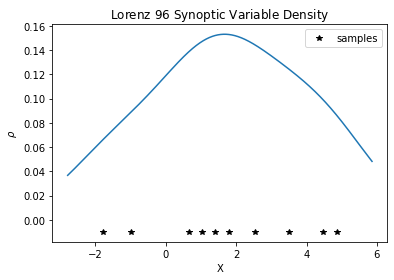

In [6]:
x_data = data.X.sel(K=10)
kde_pdf(x_data, 'Lorenz $96$ Synoptic Variable Density', xlabel='X')

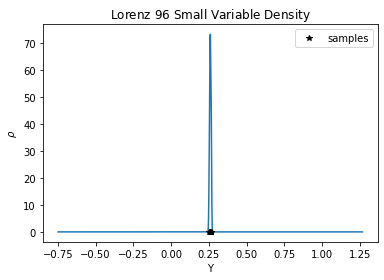

In [7]:
y_data = data.Y.sel(KJ=10)
kde_pdf(y_data, 'Lorenz $96$ Small Variable Density', xlabel='Y')

In [8]:
def autocorr(timeseries):
    mean = np.mean(timeseries)
    timeseries -= np.mean(timeseries)
    autocorr_f = np.correlate(timeseries, timeseries, mode='full')
    temp = autocorr_f[int(autocorr_f.size/2):]/autocorr_f[int(autocorr_f.size/2)]
    return temp

/rds/general/user/cfn18/home/anaconda3/envs/personalpy3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


ValueError: x and y must have same first dimension, but have shapes (10,) and (1, 10)

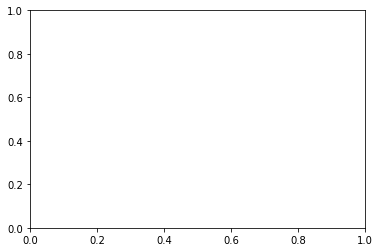

In [9]:
plt.plot(x_data.time[x_data.time < 3], autocorr(x_data.values)[x_data.time < 3])

In [15]:
plt.plot(data.time, data.Y.sel(KJ=390))

KeyError: 390

In [16]:
data

<xarray.Dataset>
Dimensions:   (K: 10, KJ: 360, time: 10)
Coordinates:
  * KJ        (KJ) int64 1 2 3 4 5 6 7 8 9 ... 353 354 355 356 357 358 359 360
  * K         (K) int64 1 2 3 4 5 6 7 8 9 10
  * time      (time) float64 0.111 0.112 0.113 0.114 ... 0.117 0.118 0.119 0.12
Data variables:
    X         (time, K) float64 dask.array<chunksize=(5, 10), meta=np.ndarray>
    Y         (time, KJ) float64 dask.array<chunksize=(5, 360), meta=np.ndarray>
    dx        (time, K) float64 dask.array<chunksize=(5, 10), meta=np.ndarray>
    dy        (time, KJ) float64 dask.array<chunksize=(5, 360), meta=np.ndarray>
    X_repeat  (time, KJ) float64 dask.array<chunksize=(5, 360), meta=np.ndarray>
Attributes:
    h:                    1
    Fs:                   10
    Ff:                   6
    c:                    10
    J:                    36
    K:                    10
    Number of variables:  370
    b:                    18.973665961010276
    dt:                   0.001